<a href="https://colab.research.google.com/github/jvishnuvardhan/Stackoverflow_Questions/blob/master/Imdb_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install tf-nightly

In [12]:
import tensorflow as tf
tf.__version__

'2.2.0-dev20200425'

In [14]:
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words=10000)

# Change review into array
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension)) # create all-zero matrix
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # If review has word, change that index to 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32') 
y_test = np.asarray(test_labels).astype('float32')

# Create model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # two int. layers w/16 hidden units each
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) # outputs the scalar prediction
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Create mini-test data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# fit model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

# Get values for plot
history_dict = history.history
history_dict.keys()
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epoch_num = [i for i in range(1,21)]

Epoch 1/20
30/30 [==============================] - 1s 44ms/step - loss: 0.5149 - accuracy: 0.7839 - val_loss: 0.4091 - val_accuracy: 0.8461
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3072 - accuracy: 0.9033 - val_loss: 0.3251 - val_accuracy: 0.8695
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2265 - accuracy: 0.9285 - val_loss: 0.3047 - val_accuracy: 0.8805
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1801 - accuracy: 0.9439 - val_loss: 0.2739 - val_accuracy: 0.8919
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1446 - accuracy: 0.9549 - val_loss: 0.2890 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1192 - accuracy: 0.9630 - val_loss: 0.2937 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0968 - accuracy: 0.9713 - val_loss: 0.3878 - val_accuracy: 0.8641
Epoch 8/20
30

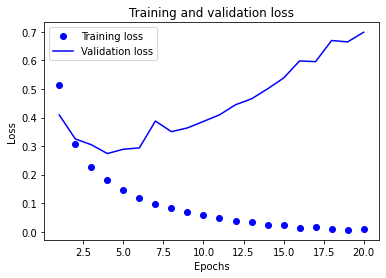

In [16]:
plt.plot(epoch_num, loss_values, 'bo', label='Training loss') 
plt.plot(epoch_num, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()